In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('flipkart_com-ecommerce_sample.csv')

# 提取根节点类别
def extract_root(category_tree):
    # 移除字符串两端的方括号和引号，然后按" >> "分割并取第一部分
    if isinstance(category_tree, str):
        clean_str = category_tree.strip('[]"')
        parts = clean_str.split(' >> ')
        if parts:
            return parts[0]
    return None

df['root_category'] = df['product_category_tree'].apply(extract_root)



In [ ]:

# 对每个root_category分组，随机抽取一行
sampled_df = df.groupby('root_category', as_index=False).apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)
# 对每一行的retail_price和discounted_price进行处理，乘以0.082并格式化为"{价格}￥"
def format_price(price):
    try:
        price_num = float(price)
        new_price = price_num * 0.082
        return f"{new_price:.2f}￥"
    except:
        return ""

sampled_df['retail_price'] = sampled_df['retail_price'].apply(format_price)
sampled_df['discounted_price'] = sampled_df['discounted_price'].apply(format_price)
print(sampled_df.head())

# 将新表保存到samples.csv中
sampled_df.to_csv('samples.csv', index=False)

                            uniq_id            crawl_timestamp  \
0  d3ddf437d7d109fd35835c6e8aaf9efa  2016-05-10 11:57:25 +0000   
1  c4802d3965281dddfee8074e89a7e3fe  2016-06-26 09:25:14 +0000   
2  811248fbd28b5c660df3c948d7c2e8f9  2016-05-08 09:13:58 +0000   
3  958f24aa15a40ccf4cf566c6a2ae007c  2016-05-08 09:18:04 +0000   
4  1a0b3810908c59fa9f038ed962135196  2016-04-24 18:34:50 +0000   

                                         product_url  \
0  http://www.flipkart.com/883-police-full-sleeve...   
1  http://www.flipkart.com/abeez-boys-men-girls/p...   
2  http://www.flipkart.com/anand-archies-girls-fl...   
3  http://www.flipkart.com/anand-archies-girls-we...   
4  http://www.flipkart.com/anasazi-casual-3-4-sle...   

                                  product_name  \
0    883 Police Full Sleeve Solid Men's Jacket   
1                       ABEEZ Boys, Men, Girls   
2                    ANAND ARCHIES Girls Flats   
3                   ANAND ARCHIES Girls Wedges   
4  ANASAZI Casua

C:\Users\19364\AppData\Local\Temp\ipykernel_28456\1751899163.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('root_category', as_index=False).apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)


: 

In [ ]:
print(sampled_df.head())

In [ ]:

# 统计每个根节点的产品数量
root_counts = sampled_df['root_category'].value_counts()
print("root_counts的行数:", len(root_counts))

# 绘制水平条形图
#plt.figure(figsize=(10, 8))
#root_counts.plot(kind='barh')
#plt.xlabel('Number of Products')
#plt.ylabel('Root Category')
#plt.title('Number of Products per Root Category')
#plt.tight_layout()
#plt.show()

【思考过程】：
首先，用户提供了一个产品信息：883 Police Full Sleeve Solid Men's Jacket。我需要根据这个信息生成一个产品设计文档，输出必须用中文，并且包括四个部分，每个部分用XML标签包裹：<hard_design>, <cost_estimate>, <core_features>, <value_proposition>。

每个部分的内容格式是一段markdown文本，所以我需要用markdown语法来写。

现在，分析产品信息：

- 产品名称：883 Police Full Sleeve Solid Men's Jacket

- 类别：["883 Police Full Sleeve Solid Men's Jacket"]

- 零售价：7499.0（可能是印度卢比或其他货币，但既然用中文输出，我可以假设是人民币或通用货币）

- 描述：Key Features: Suitable For Western Wear, Jacket Type: Riding Jacket, Fit: Slim Fit. Specifications: Sleeve Full Sleeve, Hooded No, Reversible No, Fabric Polyester, Pattern Solid, Ideal For Men's, In the Box Jacket, Additional Details Style Code CORBET16A-BLACK, Fabric Care Wash with Similar Colors, Use Detergent for Colors.

- 产品规格：JSON格式，列出了key-value pairs，如Sleeve: Full Sleeve, Hooded: No, 等等。

我需要发挥想象，补充完整信息。所以，基于现有信息，我需要推断并添加细节。

现在，针对每个部分：

1. **<hard_design>**: 硬性设计部分，包括技术指标、设计细节、材料规格、尺寸等。我需要基于现有信息推断。

   - 现有信息：Fabric: Polyester, Sleeve: Full Sleeve, Fit: Slim Fit, Pattern: Solid, Style

你是一个商品分类助手。以下是商品类别列表，以XML格式给出：

<categories>
  <category>
    <index>1</index>
    <explanation>用于工业、科学、摄影、农业、园艺和林业的化学品；未加工人造树脂；未加工塑料；肥料；灭火剂；淬火和金属焊接用制剂；保存食品用化学品；鞣料；工业用粘合剂。</explanation>
    <name>工业化学品与原料</name>
  </category>
  <category>
    <index>2</index>
    <explanation>颜料，清漆，漆；防锈剂和木材防腐剂；着色剂；媒染剂；未加工的天然树脂；绘画、装饰、印刷和艺术用金属箔及金属粉。</explanation>
    <name>油漆涂料与颜料</name>
  </category>
  <category>
    <index>3</index>
    <explanation>不含药物的化妆品和梳洗用制剂；不含药物的牙膏；香料，香精油；洗衣用漂白剂及其他物料；清洁、擦亮、去渍及研磨用制剂。</explanation>
    <name>日化洗护与香氛</name>
  </category>
  <category>
    <index>4</index>
    <explanation>工业用油和油脂；润滑剂；吸收、润湿和粘结灰尘用合成物；燃料（包括马达用燃料）和照明材料；照明用蜡烛和灯芯。</explanation>
    <name>工业油脂与燃料</name>
  </category>
  <category>
    <index>5</index>
    <explanation>药品、医用和兽医用制剂；医用卫生制剂；医用或兽医用营养食物和物质，婴儿食品；人用和动物用膳食补充剂；膏药，绷敷材料；填牙孔，牙蜡；消毒剂；消灭有害动物制剂；杀真菌剂，除莠剂。</explanation>
    <name>药品与医用制剂</name>
  </category>
  <category>
    <index>6</index>
    <explanation>普通金属及其合金；金属建筑材料；可移动金属建筑物；铁轨用金属材料；非电气用缆索和金属线；小五金具；金属

categories_count的行数: 21


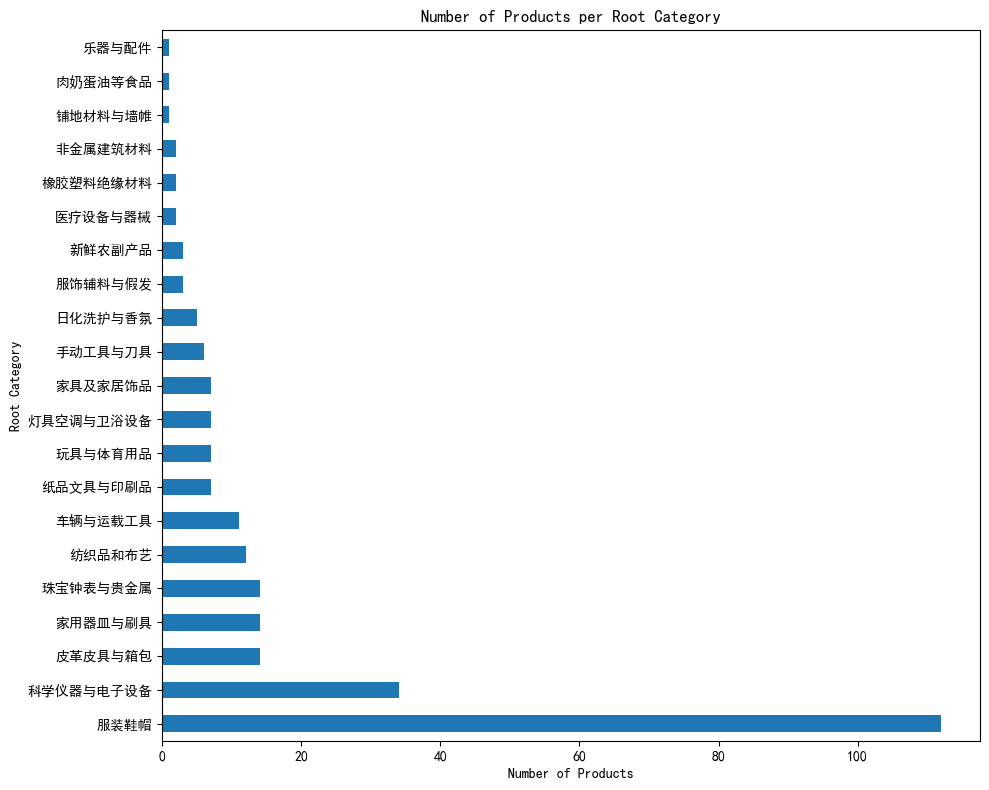

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# 设置全局中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans', 'Arial Unicode MS', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取CSV文件
df = pd.read_csv('classified_products.csv')

# 统计每个根节点的产品数量
categories_count = df['category'].value_counts()
print("categories_count的行数:", len(categories_count))

# 绘制水平条形图
plt.figure(figsize=(10, 8))
categories_count.plot(kind='barh')
plt.xlabel('Number of Products')
plt.ylabel('Root Category')
plt.title('Number of Products per Root Category')
plt.tight_layout()
plt.show()